In [21]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd 'drive/MyDrive/Colab/26 EDA - Data Cleaning'

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-281c44cdb5d3>", line 1, in <cell line: 1>
    get_ipython().run_line_magic('cd', "'drive/MyDrive/Colab/26 EDA - Data Cleaning'")
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages

In [20]:
drive.flush_and_unmount()

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("bigmart.csv")

df.duplicated().value_counts()
df.duplicated()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.drop_duplicates

In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
df = pd.read_csv("MICE Test.csv")
df.columns = ['Number', 'Multiple', 'Multiples']
df

,Number,Multiple,Multiples
0,2.0,NaN,6.0
1,4.0,8.0,12.0
2,6.0,12.0,NaN
3,NaN,16.0,24.0
4,10.0,20.0,30.0


In [ ]:
df_copy = df.copy()

In [ ]:
missing_values = df_copy.isna()
missing_values

,Number,Multiple,Multiples
0,False,True,False
1,False,False,False
2,False,False,True
3,True,False,False
4,False,False,False


In [ ]:
imputer = IterativeImputer(max_iter=1, random_state=0)
imputer

IterativeImputer(max_iter=1, random_state=0)

In [ ]:
imputed_values = imputer.fit_transform(df_copy)
imputed_values

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


array([[ 2.        ,  4.00000008,  6.        ],
       [ 4.        ,  8.        , 12.        ],
       [ 6.        , 12.        , 18.        ],
       [ 7.99999986, 16.        , 24.        ],
       [10.        , 20.        , 30.        ]])

In [ ]:
df_copy[missing_values] = imputed_values
df_copy

,Number,Multiple,Multiples
0,2.0,4.0,6.0
1,4.0,8.0,12.0
2,6.0,12.0,18.0
3,8.0,16.0,24.0
4,10.0,20.0,30.0


In [ ]:
df_copy[missing_values].shape

(5, 3)

In [ ]:
imputed_values.shape

(5, 3)

In [ ]:
from scipy import stats

out = np.abs(stats.zscore(df.Item_Outlet_Sales))
out

0       0.910601
1       1.018440
2       0.049238
3       0.849103
4       0.695373
          ...   
8518    0.349915
8519    0.956402
8520    0.579100
8521    0.196725
8522    0.829594
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

<Axes: >

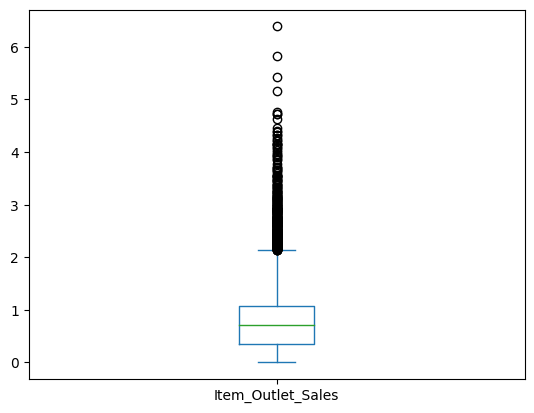

In [ ]:
out.plot(kind = 'box')

In [ ]:
outliers = out > 3
outliers

,Item_Outlet_Sales
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [ ]:
df[outliers]

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<Axes: ylabel='Item_Weight'>

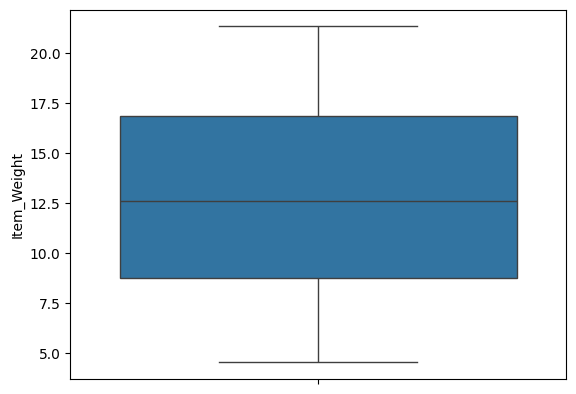

In [ ]:
import numpy as np
import seaborn as sns

df.select_dtypes(include = np.number)

sns.boxplot(df.Item_Weight)

<Axes: ylabel='Item_Visibility'>

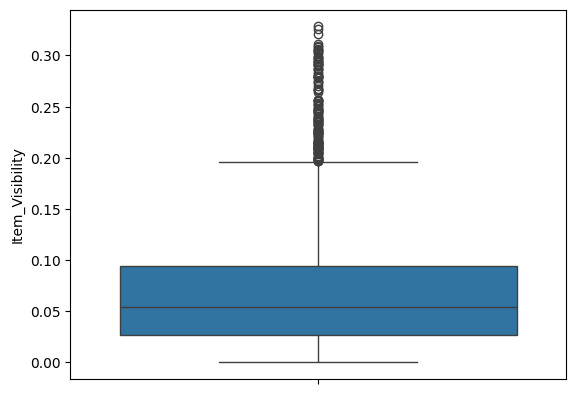

In [ ]:
sns.boxplot(df.Item_Visibility)


<Axes: ylabel='Item_MRP'>

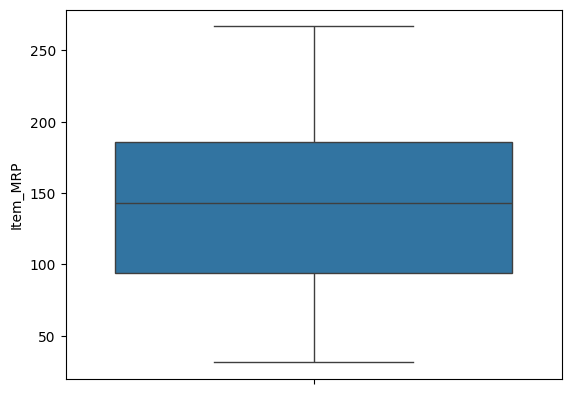

In [ ]:
sns.boxplot(df.Item_MRP)


<Axes: ylabel='Item_Type'>

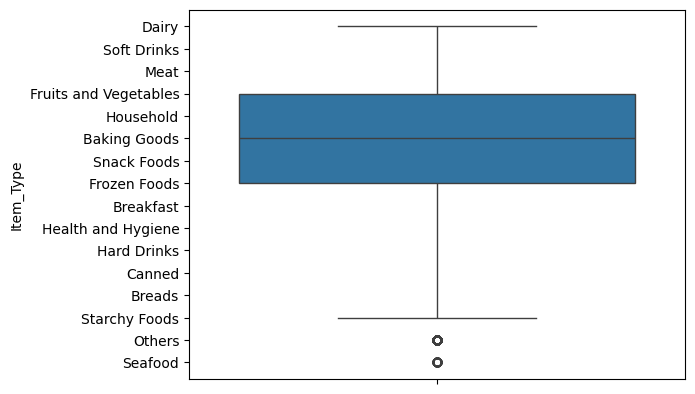

In [ ]:
sns.boxplot(df.Item_Type)